# Chapter 8: Integration

Robert Johansson

Source code listings for [Numerical Python - A Practical Techniques Approach for Industry](http://www.apress.com/9781484205549) (ISBN 978-1-484205-54-9).

The source code listings can be downloaded from http://www.apress.com/9781484205549

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import numpy as np

In [3]:
from scipy import integrate

In [4]:
import sympy

In [5]:
sympy.init_printing()

# Simpson's rule

In [6]:
a, b, X = sympy.symbols("a, b, x")
f = sympy.Function("f")

In [7]:
#x = a, (a+b)/3, 2 * (a+b)/3, b # 3rd order quadrature rule
x = a, (a+b)/2, b # simpson's rule
#x = a, b # trapezoid rule
#x = ((b+a)/2,)  # mid-point rule

In [8]:
w = [sympy.symbols("w_%d" % i) for i in range(len(x))] 

In [9]:
q_rule = sum([w[i] * f(x[i]) for i in range(len(x))])

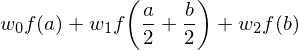

In [10]:
q_rule

In [11]:
phi = [sympy.Lambda(X, X**n) for n in range(len(x))]

In [12]:
phi

In [13]:
eqs = [q_rule.subs(f, phi[n]) - sympy.integrate(phi[n](X), (X, a, b)) for n in range(len(phi))]

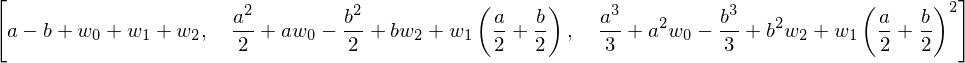

In [14]:
eqs

In [15]:
w_sol = sympy.solve(eqs, w)

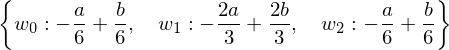

In [16]:
w_sol

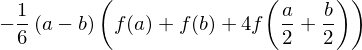

In [17]:
q_rule.subs(w_sol).simplify()

## SciPy `integrate`

### Simple integration example

In [18]:
def f(x):
    return np.exp(-x**2)

In [19]:
val, err = integrate.quad(f, -1, 1)

In [20]:
val

In [21]:
err

In [22]:
val, err = integrate.quadrature(f, -1, 1)

In [23]:
val

In [24]:
err

### Extra arguments

In [25]:
def f(x, a, b, c):
    return a * np.exp(-((x-b)/c)**2)

In [26]:
val, err = integrate.quad(f, -1, 1, args=(1, 2, 3))

In [27]:
val

In [28]:
err

### Reshuffle arguments

In [29]:
from scipy.special import jv

In [30]:
val, err = integrate.quad(lambda x: jv(0, x), 0, 5)

In [31]:
val

In [32]:
err

### Infinite limits 

In [33]:
f = lambda x: np.exp(-x**2)

In [34]:
val, err = integrate.quad(f, -np.inf, np.inf)

In [35]:
val

In [36]:
err

### Singularity

In [37]:
f = lambda x: 1/np.sqrt(abs(x))

In [38]:
a, b = -1, 1

In [39]:
integrate.quad(f, a, b)

/Users/rob/miniconda/envs/py27-npm/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


In [40]:
integrate.quad(f, a, b, points=[0])

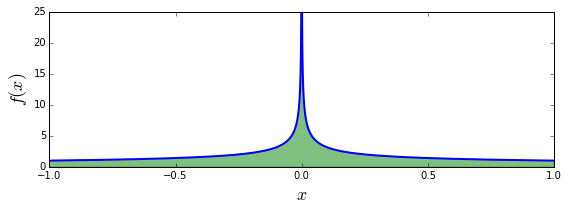

In [41]:
fig, ax = plt.subplots(figsize=(8, 3))

x = np.linspace(a, b, 10000)
ax.plot(x, f(x), lw=2)
ax.fill_between(x, f(x), color='green', alpha=0.5)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$f(x)$", fontsize=18)
ax.set_ylim(0, 25)

fig.tight_layout()
fig.savefig("ch8-diverging-integrand.pdf")

## Tabulated integrand

In [42]:
f = lambda x: np.sqrt(x)

In [43]:
a, b = 0, 2

In [44]:
x = np.linspace(a, b, 25)

In [45]:
y = f(x)

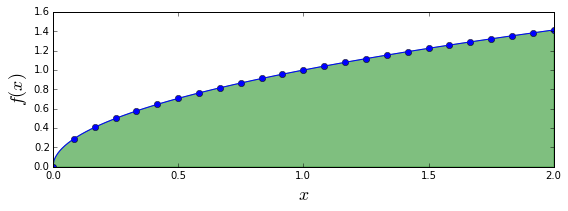

In [46]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(x, y, 'bo')
xx = np.linspace(a, b, 500)
ax.plot(xx, f(xx), 'b-')
ax.fill_between(xx, f(xx), color='green', alpha=0.5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x)$", fontsize=18)
fig.tight_layout()
fig.savefig("ch8-tabulated-integrand.pdf")

In [47]:
val_trapz = integrate.trapz(y, x)

In [48]:
val_trapz

In [49]:
val_simps = integrate.simps(y, x)

In [50]:
val_simps

In [51]:
val_exact = 2.0/3.0 * (b-a)**(3.0/2.0)

In [52]:
val_exact

In [53]:
val_exact - val_trapz

In [54]:
val_exact - val_simps

In [55]:
x = np.linspace(a, b, 1 + 2**6)

In [56]:
len(x)

In [57]:
y = f(x)

In [58]:
val_exact - integrate.romb(y, dx=(x[1]-x[0]))

In [59]:
val_exact - integrate.simps(y, dx=x[1]-x[0])

## Higher dimension

In [60]:
def f(x):
    return np.exp(-x**2)

In [61]:
%time integrate.quad(f, a, b)

CPU times: user 98 µs, sys: 46 µs, total: 144 µs
Wall time: 142 µs


In [62]:
def f(x, y):
    return np.exp(-x**2-y**2)

In [63]:
a, b = 0, 1

In [64]:
g = lambda x: 0

In [65]:
h = lambda x: 1

In [66]:
integrate.dblquad(f, a, b, g, h)

In [67]:
integrate.dblquad(lambda x, y: np.exp(-x**2-y**2), 0, 1, lambda x: 0, lambda x: 1)

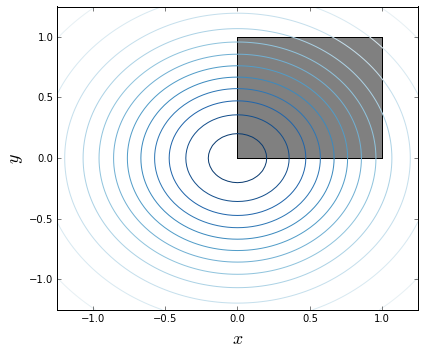

In [68]:
fig, ax = plt.subplots(figsize=(6, 5))

x = y = np.linspace(-1.25, 1.25, 75)
X, Y = np.meshgrid(x, y)

c = ax.contour(X, Y, f(X, Y), 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

bound_rect = plt.Rectangle((0, 0), 1, 1,
                           facecolor="grey")
ax.add_patch(bound_rect)

ax.axis('tight')
ax.set_xlabel('$x$', fontsize=18)
ax.set_ylabel('$y$', fontsize=18)

fig.tight_layout()
fig.savefig("ch8-multi-dim-integrand.pdf")

In [69]:
integrate.dblquad(f, 0, 1, lambda x: -1 + x, lambda x: 1 - x)

In [70]:
def f(x, y, z):
    return np.exp(-x**2-y**2-z**2)

In [71]:
integrate.tplquad(f, 0, 1, lambda x : 0, lambda x : 1, lambda x, y : 0, lambda x, y : 1)

In [72]:
integrate.nquad(f, [(0, 1), (0, 1), (0, 1)])

### nquad

In [73]:
def f(*args):
    return  np.exp(-np.sum(np.array(args)**2))

In [74]:
%time integrate.nquad(f, [(0,1)] * 1)

CPU times: user 361 µs, sys: 94 µs, total: 455 µs
Wall time: 440 µs


In [75]:
%time integrate.nquad(f, [(0,1)] * 2)

CPU times: user 10.5 ms, sys: 1.79 ms, total: 12.3 ms
Wall time: 11.6 ms


In [76]:
%time integrate.nquad(f, [(0,1)] * 3)

CPU times: user 130 ms, sys: 15.2 ms, total: 146 ms
Wall time: 135 ms


In [77]:
%time integrate.nquad(f, [(0,1)] * 4)

CPU times: user 2.59 s, sys: 43.5 ms, total: 2.63 s
Wall time: 2.67 s


In [78]:
%time integrate.nquad(f, [(0,1)] * 5)

CPU times: user 51.8 s, sys: 1.93 s, total: 53.7 s
Wall time: 52.8 s


### Monte Carlo integration

In [79]:
from skmonaco import mcquad

In [80]:
%time val, err = mcquad(f, xl=np.zeros(5), xu=np.ones(5), npoints=100000)

CPU times: user 1.23 s, sys: 50 ms, total: 1.28 s
Wall time: 1.28 s


In [81]:
val, err

In [82]:
%time val, err = mcquad(f, xl=np.zeros(10), xu=np.ones(10), npoints=100000)

CPU times: user 1.23 s, sys: 49.1 ms, total: 1.28 s
Wall time: 1.27 s


In [83]:
val, err

## Symbolic and multi-precision quadrature

In [84]:
x = sympy.symbols("x")

In [85]:
f = 2 * sympy.sqrt(1-x**2)

In [86]:
a, b = -1, 1

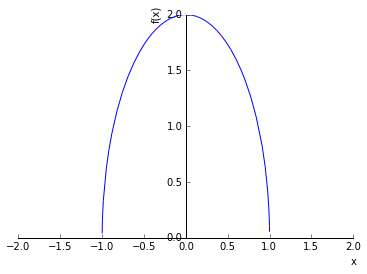

In [87]:
sympy.plot(f, (x, -2, 2));

In [88]:
val_sym = sympy.integrate(f, (x, a, b))

In [89]:
val_sym

In [90]:
sympy.mpmath.mp.dps = 75

In [91]:
f_mpmath = sympy.lambdify(x, f, 'mpmath')

In [92]:
val = sympy.mpmath.quad(f_mpmath, (a, b))

In [93]:
sympy.sympify(val)

In [94]:
sympy.N(val_sym, sympy.mpmath.mp.dps+1) - val

In [95]:
%timeit sympy.mpmath.quad(f_mpmath, [a, b])

100 loops, best of 3: 12.3 ms per loop


In [96]:
f_numpy = sympy.lambdify(x, f, 'numpy')

In [97]:
%timeit integrate.quad(f_numpy, a, b)

1000 loops, best of 3: 996 µs per loop


### double and triple integrals

In [98]:
def f2(x, y):
    return np.cos(x)*np.cos(y)*np.exp(-x**2-y**2)

def f3(x, y, z):
    return np.cos(x)*np.cos(y)*np.cos(z)*np.exp(-x**2-y**2-z**2)

In [99]:
integrate.dblquad(f2, 0, 1, lambda x : 0, lambda x : 1)

In [100]:
integrate.tplquad(f3, 0, 1, lambda x : 0, lambda x : 1, lambda x, y : 0, lambda x, y : 1)

In [101]:
x, y, z = sympy.symbols("x, y, z")

In [102]:
f2 = sympy.cos(x)*sympy.cos(y)*sympy.exp(-x**2-y**2)

In [103]:
f3 = sympy.exp(-x**2 - y**2 - z**2)

In [104]:
f2_numpy = sympy.lambdify((x, y), f2, 'numpy')

In [105]:
integrate.dblquad(f2_numpy, 0, 1, lambda x: 0, lambda x: 1)

In [106]:
f3_numpy = sympy.lambdify((x, y, z), f3, 'numpy')

In [107]:
integrate.tplquad(f3_numpy, 0, 1, lambda x: 0, lambda x: 1, lambda x, y: 0, lambda x, y: 1)

In [108]:
sympy.mpmath.mp.dps = 30

In [109]:
f2_mpmath = sympy.lambdify((x, y), f2, 'mpmath')

In [110]:
sympy.mpmath.quad(f2_mpmath, (0, 1), (0, 1))

mpf('0.430564794306099099242308990195783')

In [111]:
f3_mpmath = sympy.lambdify((x, y, z), f3, 'mpmath')

In [112]:
res = sympy.mpmath.quad(f3_mpmath, (0, 1), (0, 1), (0, 1))

In [114]:
sympy.sympify(res)

## Line integrals

In [115]:
t, x, y = sympy.symbols("t, x, y")

In [116]:
C = sympy.Curve([sympy.cos(t), sympy.sin(t)], (t, 0, 2 * sympy.pi))

In [117]:
sympy.line_integrate(1, C, [x, y])

In [118]:
sympy.line_integrate(x**2 * y**2, C, [x, y])

## Integral transformations

### Laplace transforms

In [119]:
s = sympy.symbols("s")

In [120]:
a, t = sympy.symbols("a, t", positive=True)

In [121]:
f = sympy.sin(a*t)

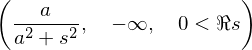

In [122]:
sympy.laplace_transform(f, t, s)

In [123]:
F = sympy.laplace_transform(f, t, s, noconds=True)

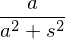

In [124]:
F

In [125]:
sympy.inverse_laplace_transform(F, s, t, noconds=True)

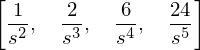

In [126]:
[sympy.laplace_transform(f, t, s, noconds=True) for f in [t, t**2, t**3, t**4]]

In [127]:
n = sympy.symbols("n", integer=True, positive=True)

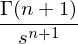

In [128]:
sympy.laplace_transform(t**n, t, s, noconds=True)

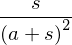

In [129]:
sympy.laplace_transform((1 - a*t) * sympy.exp(-a*t), t, s, noconds=True)

### Fourier Transforms

In [130]:
w = sympy.symbols("omega")

In [131]:
f = sympy.exp(-a*t**2)

In [132]:
help(sympy.fourier_transform)

Help on function fourier_transform in module sympy.integrals.transforms:

fourier_transform(f, x, k, **hints)
    Compute the unitary, ordinary-frequency Fourier transform of `f`, defined
    as
    
    .. math:: F(k) = \int_{-\infty}^\infty f(x) e^{-2\pi i x k} \mathrm{d} x.
    
    If the transform cannot be computed in closed form, this
    function returns an unevaluated :class:`FourierTransform` object.
    
    For other Fourier transform conventions, see the function
    :func:`sympy.integrals.transforms._fourier_transform`.
    
    For a description of possible hints, refer to the docstring of
    :func:`sympy.integrals.transforms.IntegralTransform.doit`.
    Note that for this transform, by default ``noconds=True``.
    
    >>> from sympy import fourier_transform, exp
    >>> from sympy.abc import x, k
    >>> fourier_transform(exp(-x**2), x, k)
    sqrt(pi)*exp(-pi**2*k**2)
    >>> fourier_transform(exp(-x**2), x, k, noconds=False)
    (sqrt(pi)*exp(-pi**2*k**2), True)
  

In [133]:
F = sympy.fourier_transform(f, t, w)

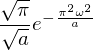

In [134]:
F

In [135]:
sympy.inverse_fourier_transform(F, w, t)

## Versions

In [136]:
%reload_ext version_information

In [137]:
%version_information numpy, matplotlib, scipy, sympy

Software,Version
Python,2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython,3.2.1
OS,Darwin 14.1.0 x86_64 i386 64bit
numpy,1.9.2
matplotlib,1.4.3
scipy,0.16.0
sympy,0.7.6
